# Standard Imports 

In [4]:
import wrangle_zillow as w 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


# Acquire, Prep and Spliting our data :
- Stored the sensitive data in an env.py file in order to get conncetion to the mySQL server and abtain our data.

- To acquire the zillow data for singel family properties, I used the zillow database in the mySQL server, and joined the following tables to gather data: properties_2017, predictions_2017, propertylandusetype

- Created acquire.py and user-defined function get_zillow_data() to acquire and cache data.

In [5]:
# First Think we are 
train, validate, test = w.split(w.prepare(w.aquire_zillow_data()))

y_train = train['tax_valuedollar_cnt']
X_train = train.drop(['tax_valuedollar_cnt'], axis=1)

# Split the validation data into target and feature variables
y_validate = validate['tax_valuedollar_cnt']
X_validate = validate.drop(['tax_valuedollar_cnt'], axis=1)

# Split the test data into target and feature variables
y_test = test['tax_valuedollar_cnt']
X_test = test.drop(['tax_valuedollar_cnt'], axis=1)


In [3]:
train.shape

(224000, 9)

▪️ **Missing Values (NaN):**

- We feel comfortable dropping null values because that's less than **0.01%** of the entire dataset

▪️ **Data Types:**
- Column `age` is converted **int** datatype

▪️ **Data Mapping:**
- Created new column `county` corresponding to `fips_code`
- Created new column `bedrooms_size`, `bathrooms_size` corresponding to `bedrooms`, `bathrooms` value

▪️ **Dummy variables: created dummy variables for binary and non-binary categorical variables**

▪️ **Outliers:**
- Upper bound: <span style="color: blue"> **Q3 + 1.5 * IQR** </span>
- Lower bund: <span style="color: blue"> **Q1 - 1.5 * IQR** </span>
- Each column is adjusted based on distribution

▪️ **Missing Values (NaN):**
- Column `has_pool` null values are replaced with 0
    
- All other null values are <span style="color: blue"> **dropped** </span>

- We feel comfortable dropping null values (572 rows) because that's **1.09%** of the entire dataset

▪️ **Data Types:**
- Column `age` is converted **int** datatype

▪️ **Data Mapping:**
- Created new column `county` corresponding to `fips_code`
- Created new column `bedrooms_size`, `bathrooms_size` corresponding to `bedrooms`, `bathrooms` value

▪️ **Dummy variables: created dummy variables for binary and non-binary categorical variables**

▪️ **Outliers:**
- Upper bound: <span style="color: blue"> **Q3 + 1.5 * IQR** </span>
- Lower bund: <span style="color: blue"> **Q1 - 1.5 * IQR** </span>
- Each column is adjusted based on distribution## Lets visualize our data 

# Explore

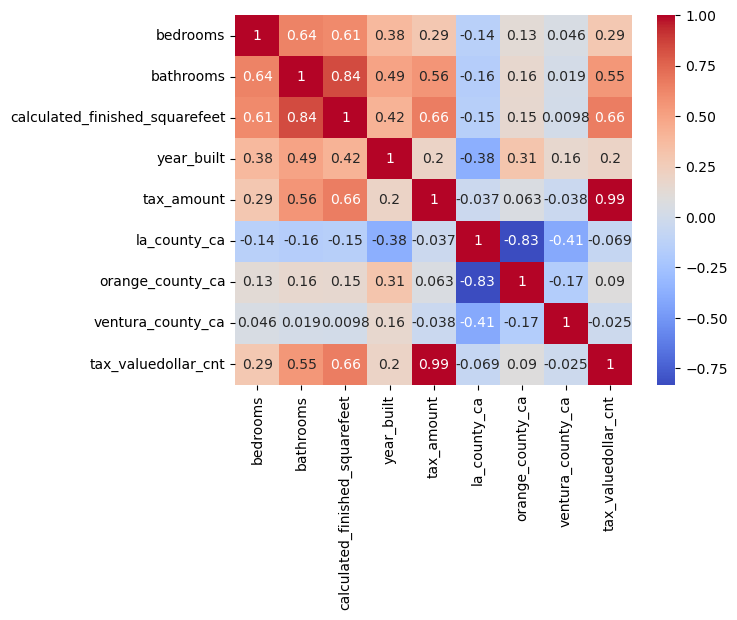

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
['bedrooms','bathrooms','calculated_finished_squarefeet','year_built','tax_amount','la_county_ca','orange_county_ca','ventura_county_ca']

corr_matrix = train[columns_to_test + ['tax_valuedollar_cnt']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'calculated_finished_squarefeet'}>],
       [<AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'tax_amount'}>,
        <AxesSubplot:title={'center':'la_county_ca'}>],
       [<AxesSubplot:title={'center':'orange_county_ca'}>,
        <AxesSubplot:title={'center':'ventura_county_ca'}>,
        <AxesSubplot:>]], dtype=object)

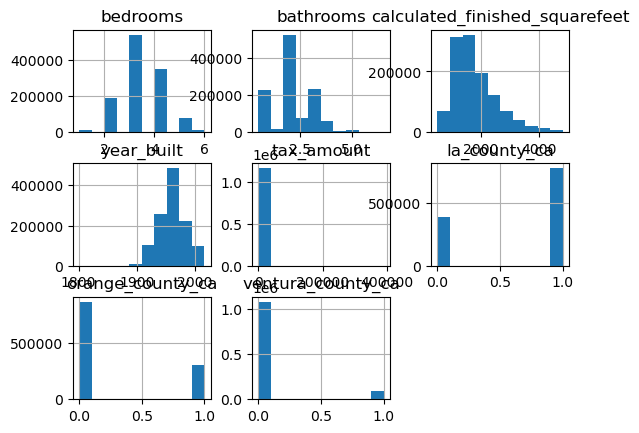

In [3]:
X_train.hist()

### lets investigate county and tax_valuedollar_cnt 

In [6]:
la_county = train[train['la_county_ca'] == 1]
orange_county = train[train['orange_county_ca'] == 1]
orange_county = train[train['ventura_county_ca'] == 1]


In [7]:
descriptive_summary_la =round(la_county.describe(),2)
descriptive_summary_orange =round(orange_county.describe(),2)
descriptive_summary_ventura =round(orange_county.describe(),2)


### What are the key take aways from houses in LA county  ? 

In [29]:
descriptive_summary_la 

,bedrooms,bathrooms,calculated_finished_squarefeet,year_built,tax_amount,la_county_ca,orange_county_ca,ventura_county_ca,tax_valuedollar_cnt
count,2005.00,2005.00,2005.00,2005.00,2005.00,2005.0,2005.0,2005.0,2005.00
mean,3.15,2.11,1744.60,1954.01,5446.89,1.0,0.0,0.0,430688.79
std,0.93,1.01,893.15,21.43,7211.97,0.0,0.0,0.0,610895.52
min,0.00,0.00,356.00,1890.00,298.16,1.0,0.0,0.0,14163.00
25%,3.00,1.00,1200.00,1941.00,2469.73,1.0,0.0,0.0,176779.00
50%,3.00,2.00,1518.00,1953.00,3923.65,1.0,0.0,0.0,300303.00
75%,4.00,3.00,1992.00,1963.00,5934.29,1.0,0.0,0.0,474000.00
max,8.00,10.00,10333.00,2015.00,121337.26,1.0,0.0,0.0,10107486.00


## Key Take away:
- Average home in La is $430,588.00
- Average of 3 beds and 2 baths 

In [37]:
import scipy.stats as stats

columns_to_test = ['bedrooms', 'bathrooms', 'calculated_finished_squarefeet', 'year_built', 'tax_amount', 'la_county_ca', 'orange_county_ca', 'ventura_county_ca']

def hypothesis_test(data, x, y, alpha=0.05):
    # Perform Pearson correlation test
    r, p = stats.pearsonr(data[x], data[y])
    print(f"The Pearson correlation coefficient between {x} and {y} is {r:.2f} with a p-value of {p:.2f}")
    
    # Determine whether to accept or reject null hypothesis
    if p < alpha:
        print(f"Since the p-value is less than {alpha}, we can reject the null hypothesis and conclude that {x} and {y} are correlated.")
        print('_______________________________________________________')
    else:
        print(f"Since the p-value is greater than or equal to {alpha}, we fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest a correlation between {x} and {y}.")
        print('_______________________________________________________')

# Test each variable against tax_valuedollar_cnt
for var in ['bedrooms', 'bathrooms', 'calculated_finished_squarefeet', 'year_built', 'tax_amount', 'la_county_ca', 'orange_county_ca', 'ventura_county_ca']:
    hypothesis_test(train, var, 'tax_valuedollar_cnt')
    


The Pearson correlation coefficient between bedrooms and tax_valuedollar_cnt is 0.29 with a p-value of 0.00
Since the p-value is less than 0.05, we can reject the null hypothesis and conclude that bedrooms and tax_valuedollar_cnt are correlated.
_______________________________________________________
The Pearson correlation coefficient between bathrooms and tax_valuedollar_cnt is 0.55 with a p-value of 0.00
Since the p-value is less than 0.05, we can reject the null hypothesis and conclude that bathrooms and tax_valuedollar_cnt are correlated.
_______________________________________________________
The Pearson correlation coefficient between calculated_finished_squarefeet and tax_valuedollar_cnt is 0.66 with a p-value of 0.00
Since the p-value is less than 0.05, we can reject the null hypothesis and conclude that calculated_finished_squarefeet and tax_valuedollar_cnt are correlated.
_______________________________________________________
The Pearson correlation coefficient between year

# Now Lets Model 

# Model up some base lines values 

In [7]:
# Lets set some base lines
y_train_mean = y_train.mean()

# Create an array of the same shape as y_test with the mean value
y_pred_baseline = np.full_like(y_test, y_train_mean)

# Calculate the SSE
baseline_sse = np.sum(np.square(y_test - y_pred_baseline))
print("Baseline SSE:", baseline_sse)

# Calculate the MSE
baseline_mse = baseline_sse / len(y_test)
print("Baseline MSE:", baseline_mse)

# Calculate the RMSE
baseline_rmse = np.sqrt(baseline_mse)
print("Baseline RMSE:", baseline_rmse)

Baseline SSE: 1478460961696035.8
Baseline MSE: 184807620212.00446
Baseline RMSE: 429892.56822141557


# LinearRegression (OLS) Model 1:

In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the model
ols_model = LinearRegression()

# Fit the model on the training data
ols_model.fit(X_train_scaled, y_train)

# Make predictions on the validation data
ols_y_pred = ols_model.predict(X_validate_scaled)

# Calculate the mean squared error
ols_mse = mean_squared_error(y_validate, ols_y_pred)

# Calculate the root mean squared error
ols_rmse = ols_mse ** 0.5

# Calculate the sum of squared errors
ols_sse = ((y_validate - ols_y_pred) ** 2).sum()

# Calculate the error delta
ols_error_delta = ols_sse - baseline_sse

# Create a dataframe with the model metrics
ols_model_metrics = pd.DataFrame({
    'metric': ['SSE', 'MSE', 'RMSE'],
    'model_error': [ols_sse, ols_mse, ols_rmse],
    'error_delta': [ols_error_delta, ols_mse - baseline_mse, ols_rmse - baseline_rmse]
})

# Round the values in the dataframe
ols_model_metrics = ols_model_metrics.round(3)

# Print the dataframe
print(ols_model_metrics)


  metric   model_error   error_delta
0    SSE  4.097596e+15 -1.849864e+17
1    MSE  7.977301e+09 -4.337591e+11
2   RMSE  8.931574e+04 -5.753168e+05


# Lasso_model 

In [9]:
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_squared_error

# Instantiate the model
lasso_model = LassoLars()

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the validation data
lasso_y_pred = lasso_model.predict(X_validate)

# Calculate the mean squared error
lasso_mse = mean_squared_error(y_validate, lasso_y_pred)

# Calculate the root mean squared error
lasso_rmse = lasso_mse ** 0.5

# Calculate the sum of squared errors
lasso_sse = ((y_validate - lasso_y_pred) ** 2).sum()

# Calculate the error delta
lasso_error_delta = lasso_sse - baseline_sse

# Create a dataframe with the model metrics
lasso_model_metrics = pd.DataFrame({
    'metric': ['SSE', 'MSE', 'RMSE'],
    'model_error': [lasso_sse, lasso_mse, lasso_rmse],
    'error_delta': [lasso_error_delta, lasso_mse - baseline_mse, lasso_rmse - baseline_rmse]
})

# Round the values in the dataframe
lasso_model_metrics = lasso_model_metrics.round(3)

# Print the dataframe
print(lasso_model_metrics)


  metric   model_error   error_delta
0    SSE  5.093221e+13 -1.427529e+15
1    MSE  5.305439e+09 -1.795022e+11
2   RMSE  7.283844e+04 -3.570541e+05


In [1]:
lasso_metrics = {
    'metric': ['SSE', 'MSE', 'RMSE'],
    'model_error': [5.502991e+13, 5.732282e+09, 7.571183e+04],
    'error_delta': [-1.426638e+15, -1.794762e+11, -3.546467e+05]
}

linear_regression_metrics = {
    'metric': ['SSE', 'MSE', 'RMSE'],
    'model_error': [5.500952e+13, 5.730159e+09, 7.569781e+04],
    'error_delta': [-1.426658e+15, -1.794783e+11, -3.546607e+05]
}

# Compare error_delta values for both models
for i, metric in enumerate(lasso_metrics['metric']):
    lasso_error_delta = lasso_metrics['error_delta'][i]
    linear_regression_error_delta = linear_regression_metrics['error_delta'][i]
    
    if lasso_error_delta < linear_regression_error_delta:
        print(f"{metric}: Lasso model performed better.")
    elif lasso_error_delta > linear_regression_error_delta:
        print(f"{metric}: Linear Regression OLS model performed better.")
    else:
        print(f"{metric}: Both models performed equally.")


SSE: Linear Regression OLS model performed better.
MSE: Linear Regression OLS model performed better.
RMSE: Linear Regression OLS model performed better.
